In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithmetic\IPyNb


In [31]:
df = pd.read_csv("../Java/Output/LogVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,Gaussian,0.2,1.0,0.000000,1.01517,-7.91978,2.57022,0.215222,0.212005,-0.025046,...,0.043001,0.033736,0.020745,0.011581,0.005237,0.003021,0.000906,0.000403,0.000000,0.000000
1,Gaussian,0.2,2.0,0.693147,1.01071,-5.15406,3.05155,0.102382,0.101297,-0.006709,...,0.042523,0.030990,0.023067,0.015144,0.008826,0.004914,0.003310,0.001203,0.000802,0.000401
2,Gaussian,0.2,5.0,1.609440,1.00925,-4.43012,3.37589,0.040451,0.040080,-0.001426,...,0.040188,0.029465,0.023051,0.016637,0.009321,0.006615,0.003508,0.003007,0.001002,0.000601
3,Gaussian,0.2,10.0,2.302590,1.00886,-4.24012,3.49526,0.020187,0.020010,-0.000508,...,0.039379,0.029058,0.023447,0.016733,0.009419,0.007214,0.003808,0.002806,0.001503,0.000701
4,Gaussian,0.1,0.5,-0.693147,1.01517,-7.91978,2.57022,0.215222,0.212005,-0.025046,...,0.043001,0.033736,0.020745,0.011581,0.005237,0.003021,0.000906,0.000403,0.000000,0.000000


In [32]:
sorted(df['Noise'].unique())

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2]

In [33]:
sorted(df['X'].unique())

[0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.35, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0]

In [34]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [35]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=True, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('log(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

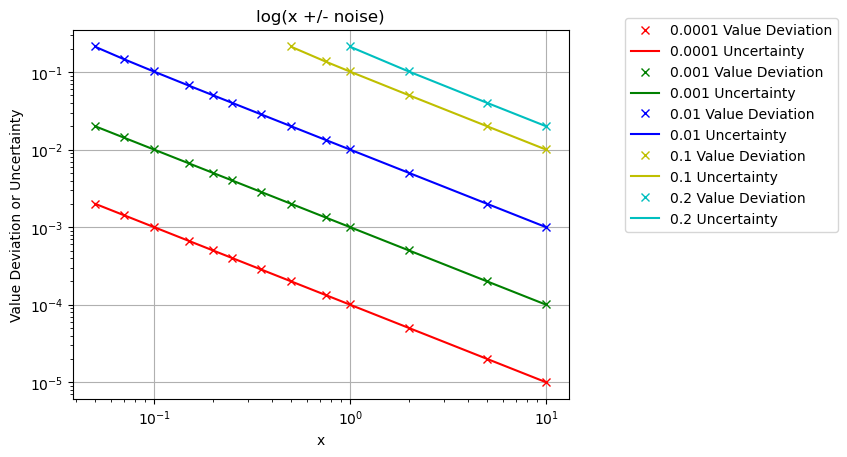

In [36]:
PlotValues()

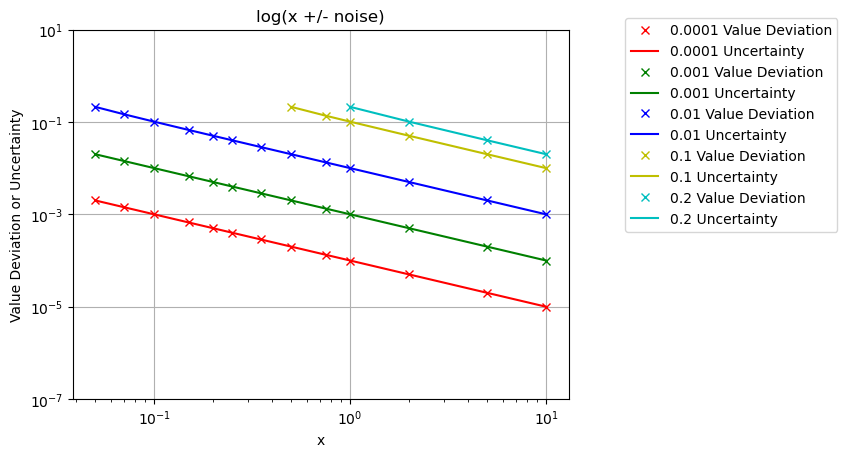

In [37]:
PlotValues(noiseType='Uniform', ylim=[1e-7, 1e1])

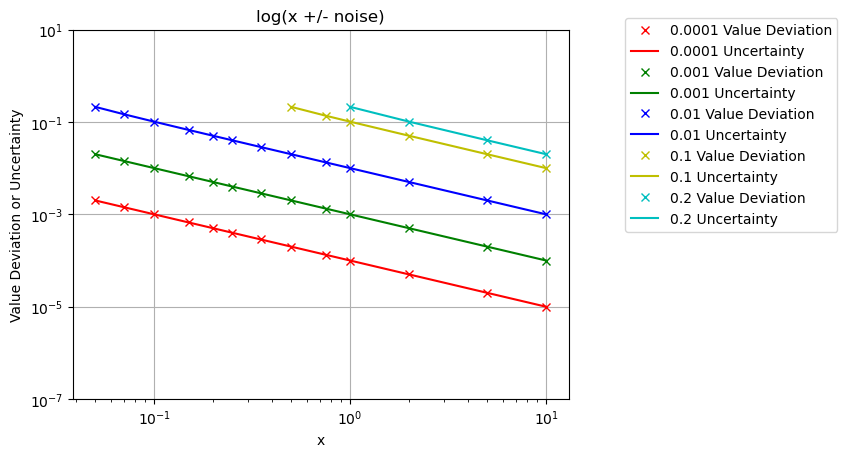

In [38]:
PlotValues(ylim=[1e-7, 1e1], noiseType='Uniform')

In [39]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'], ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    ax.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_xscale('log')
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.6, 1.0))
    ax2.legend(bbox_to_anchor=(1.6, 0.3))

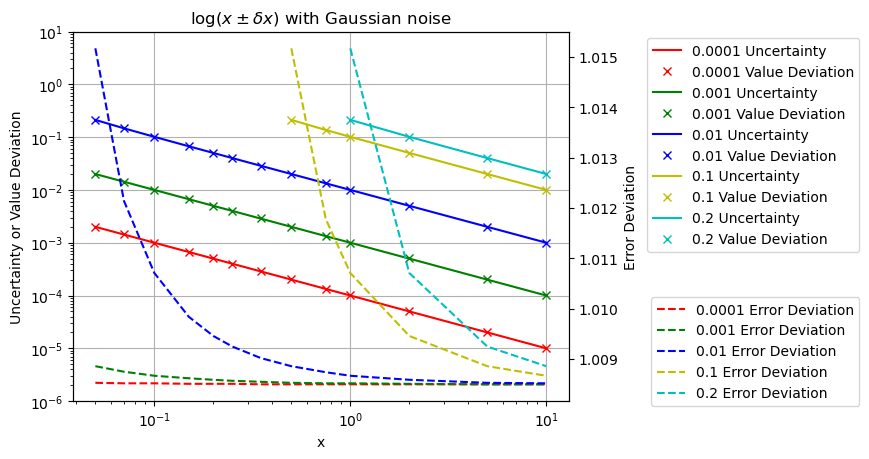

In [40]:
PlotErrorDev()

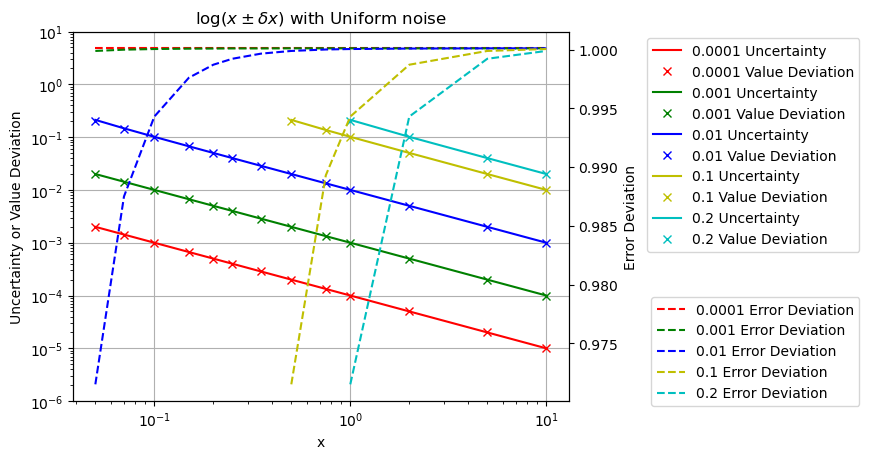

In [41]:
PlotErrorDev('Uniform')

In [42]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(0.2,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    ax.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.58, 0.9))

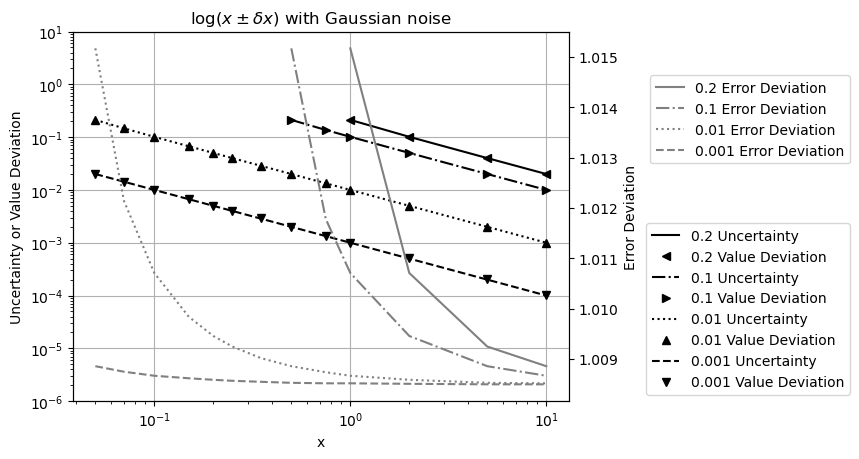

In [43]:
PlotErrorDev()

In [44]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15)]['Error Deviation'].describe()

count    75.000000
mean      1.009059
std       0.001445
min       1.008500
25%       1.008500
50%       1.008510
75%       1.008745
max       1.015170
Name: Error Deviation, dtype: float64

# Mean vs Bias 

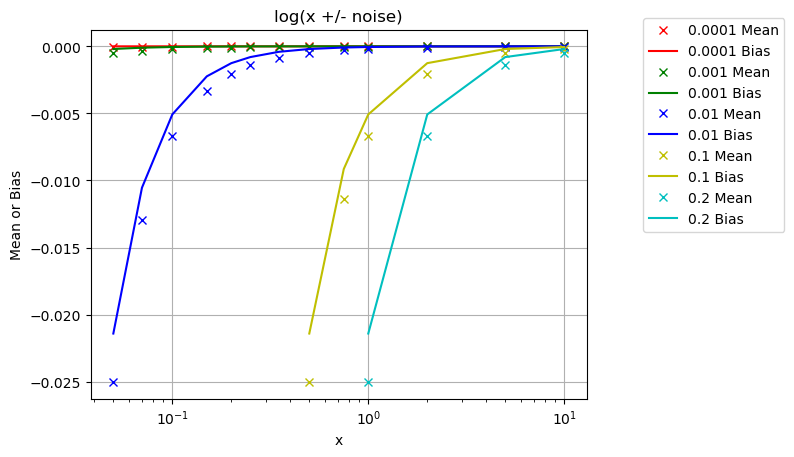

In [45]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

# Error Maximum and Minimum

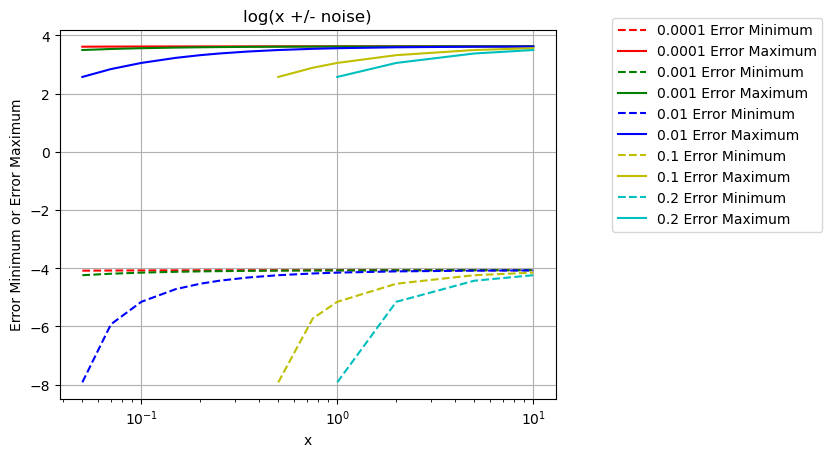

In [46]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# vs Noise vs X

In [47]:
df[df['Uncertainty']==0].head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0


In [48]:
def PlotSurface(value, noiseType, maxNoise=1e-2, xlim=(-10,10)):
    '''
    Some data are missing for noise>=1e-2 for pivot
    '''
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType) & (df['Noise']>0) & (df['Noise']<maxNoise)
                        & (df['X']>=xlim[0]) & (df['X']<=xlim[1])]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = np.log2(dfOrderVsNoise.columns.values)
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 2)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])


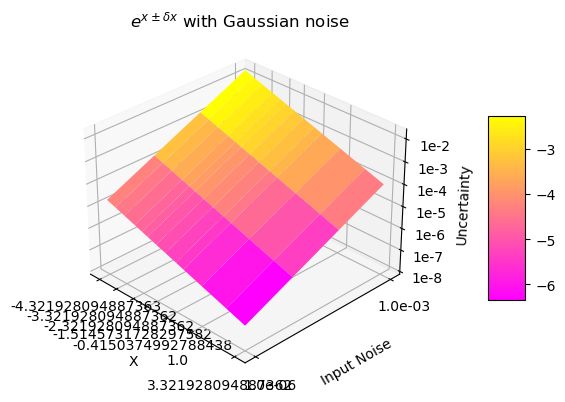

In [49]:
dfOrderVsNoise = PlotSurface('Uncertainty', 'Gaussian')

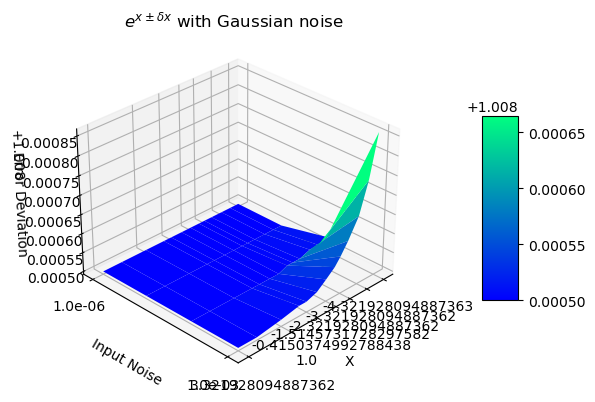

In [50]:
PlotSurface('Error Deviation', 'Gaussian')

# Histogram

In [51]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

KeyError: "None of [Index(['-2.9', '-2.7', '-2.5', '-2.3', '-2.1', '-1.9', '-1.7', '-1.5', '-1.3',\n       '-1.1', '-0.9', '-0.7', '-0.5', '-0.3', '-0.1', '0.1', '0.3', '0.5',\n       '0.7', '0.9', '1.1', '1.3', '1.5', '1.7', '1.9', '2.1', '2.3', '2.5',\n       '2.7', '2.9'],\n      dtype='object')] are in the [columns]"

In [ ]:
def PlotHisto( sNoiseType=['Gaussian'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


In [ ]:
PlotHisto(sNoiseType=['Gaussian'])

In [ ]:
PlotHisto()

In [ ]:
PlotHisto(sX=[1])

In [ ]:
PlotHisto(sNoise=[0.2])